# **Midterm Project Visualisasi Data IF-42-GAB03**
Nama: Ni Made Dwipadini Puspitarini

NIM : 1301194141

# **Import Dataset**

In [ ]:
# connecting to google drive
!gdown --id 1ibFp9ibVVxDUXkL8JEFIzOQkT2qERFl6
!gdown --id 18PbNVpM6UPHscsUI7mvtyk1uzJXzUU07

Downloading...
From: https://drive.google.com/uc?id=1ibFp9ibVVxDUXkL8JEFIzOQkT2qERFl6
To: /content/Data Set 1.csv
100% 1.15k/1.15k [00:00<00:00, 963kB/s]
Downloading...
From: https://drive.google.com/uc?id=18PbNVpM6UPHscsUI7mvtyk1uzJXzUU07
To: /content/Data Set 2.csv
100% 2.82k/2.82k [00:00<00:00, 4.69MB/s]


# **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read and understanding Dataset 1**

In [ ]:
# membaca dataset pertama dan menampilkan 5 data pertama
df1 = pd.read_csv("Data Set 1.csv")
df1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


In [ ]:
# mengecek ukuran baris dan kolom
df1.shape

(30, 8)

In [ ]:
# mengecek jumlah nilai null pada dataset pertama
df1.isna().sum()

date             0
new_tested       0
acc_tested       0
new_confirmed    0
acc_confirmed    0
acc_negative     0
being_checked    0
isolated         0
dtype: int64

In [ ]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           30 non-null     object
 1   new_tested     30 non-null     int64 
 2   acc_tested     30 non-null     int64 
 3   new_confirmed  30 non-null     int64 
 4   acc_confirmed  30 non-null     int64 
 5   acc_negative   30 non-null     int64 
 6   being_checked  30 non-null     int64 
 7   isolated       30 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.0+ KB


In [ ]:
# menambahkan kolom tanggal yang berisikan bagian tanggal saja dari kolom date (slicing)
df1['Tanggal'] = df1['date'].apply(lambda x:x[:2]).astype(int)

# **Soal 1 (10 point)**
Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [ ]:
# mengambil kolom yang diperlukan yaitu tanggal, acc_tested, acc_confirmed, dan acc_negative
soal1 = df1[['Tanggal', 'acc_tested', 'acc_confirmed', 'acc_negative']]
soal1 = soal1.rename(columns={'acc_tested' : 'Tes Sampel', 'acc_confirmed' : 'Terkonfirmasi Positif', 
                        'acc_negative' : 'Terkonfirmasi Negatif'})
soal1.set_index('Tanggal', inplace=True)
soal1.head()

,Tes Sampel,Terkonfirmasi Positif,Terkonfirmasi Negatif
Tanggal,,,
2,339,2,335
3,341,2,337
4,372,2,356
5,388,2,371
6,450,4,422


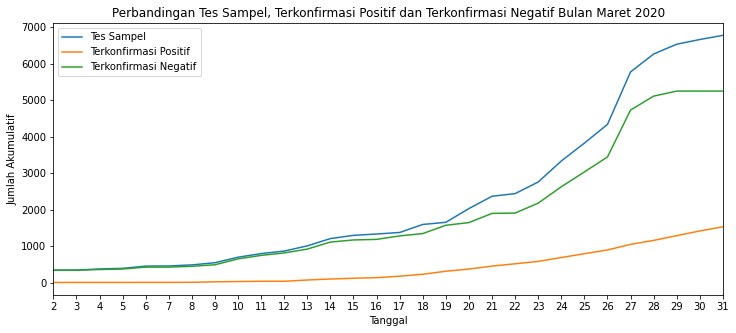

In [ ]:
# visualisasi line plot
ax = soal1.plot(kind='line', figsize=(12, 5))
ax.set_xlim([2, 31])
ax.set_xticks(np.arange(2, 32, 1))
plt.title('Perbandingan Tes Sampel, Terkonfirmasi Positif dan Terkonfirmasi Negatif Bulan Maret 2020')
plt.ylabel('Jumlah Akumulatif')
plt.xlabel('Tanggal')
plt.show()

Berdasarkan hasil visualisasi di atas, dari hasil jumlah akumulatif tes sampel dapat dilihat bahwa jumlah akumulatif terkonfirmasi negatif lebih banyak daripada jumlah akumulatif terkonfirmasi positif. Jumlah akumulatif terkonfirmasi negatif sekitar 5000an, jumlah akumulatif terkonfirmasi positif sekitar 1500an, dan jumlah akumulatif tes sampel sekitar 6700an. 

# **Soal 2 (30 poin)**
Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.

1.   Positive	rate	= (Jumlah	terkonfirmasi	positif / Jumlah	tes	sampel) × 100%

2.   Negative	rate	= (Jumlah	terkonfirmasi	negatif / Jumlah	tes	sampel) × 100%

In [ ]:
# menghitung nilai positive rate dan negative rate
df1['positive_rate'] = (df1['acc_confirmed'] / df1['acc_tested']) * 100
df1['negative_rate'] = (df1['acc_negative'] / df1['acc_tested']) * 100
df1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Tanggal,positive_rate,negative_rate
0,02-Mar-20,339,339,2,2,335,2,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,3,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,4,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,5,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,6,0.888889,93.777778


Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan
negativity rate untuk periode waktu yang tersedia

In [ ]:
# mengambil kolom yang diperlukan
soal2 = df1[['positive_rate', 'negative_rate']].set_index(df1['Tanggal'])
soal2.head()

,positive_rate,negative_rate
Tanggal,,
2,0.589971,98.820059
3,0.586510,98.826979
4,0.537634,95.698925
5,0.515464,95.618557
6,0.888889,93.777778


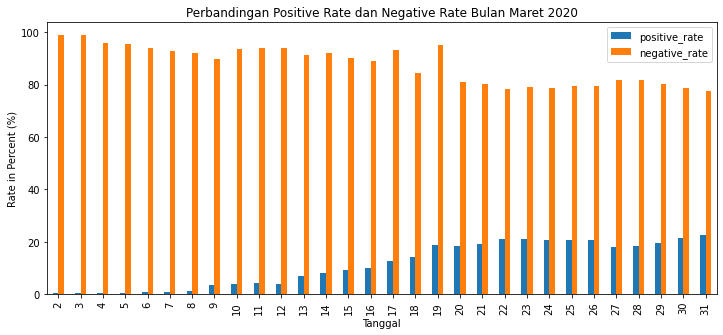

In [ ]:
# visualisasi bar plot
soal2.plot(kind = 'bar', figsize = (12,5))
plt.title('Perbandingan Positive Rate dan Negative Rate Bulan Maret 2020')
plt.ylabel('Rate in Percent (%)')
plt.xlabel('Tanggal')
plt.show()

Output diatas merupakan bar plot perbandingan positive rate dan negative rate untuk periode waktu yang tersedia.

Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

In [ ]:
df1.loc[df1['positive_rate'] == df1['positive_rate'].max(), 'date']

29    31-Mar-20
Name: date, dtype: object

**Jawab :**

Apabila dilihat secara visual melalui bar plot, dapat terlihat bahwa nilai positive rate tertinggi jatuh pada tanggal 31 Maret 2020. Untuk memastikan pernyataan ini, saya mencoba mencari nilai positive rate tertinggi menggunakan loc dan menghasilkan output yang sama yaitu 31 Maret 2020.

Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [ ]:
df1.loc[df1['negative_rate'] == df1['negative_rate'].max(), 'date']

1    03-Mar-20
Name: date, dtype: object

**Jawab :**

Apabila dilihat secara visual melalui bar plot, dapat terlihat bahwa nilai negative rate tertinggi jatuh pada tanggal 3 Maret 2020. Untuk memastikan pernyataan ini, saya mencoba mencari nilai negative rate tertinggi menggunakan loc dan menghasilkan output yang sama yaitu 3 Maret 2020.

# **Soal 3 (20 poin)**
Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada dataset.

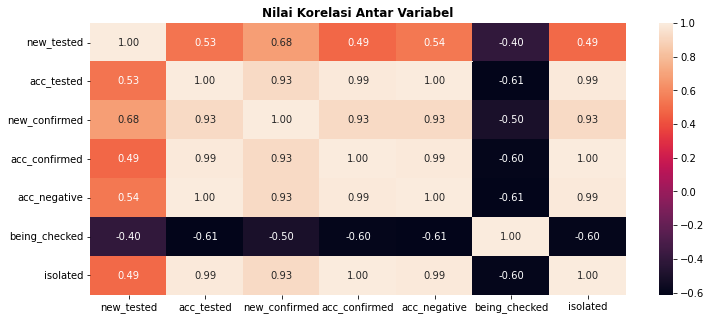

In [ ]:
# drop kolom tambahan
df1 = df1.drop(['Tanggal', 'positive_rate', 'negative_rate'], axis = 1)

# visualisasi heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(data = df1.corr(), annot = True, fmt='.2f').set_title('Nilai Korelasi Antar Variabel', weight = 'bold')
plt.show()

Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan penjelasan terkait nilai korelasi tersebut.

**Jawab :**

Suatu variabel dikatakan memiliki nilai korelasi paling positif apabila memiliki nilai korelasi yang mendekati 1. Artinya, antar variabel-variabel tersebut memiliki hubungan yang positif kuat dengan kata lain saling berbanding lurus atau berkorelasi antar variabelnya. Berdasarkan heatmap diatas, maka berikut adalah 3 pasang variabel yang memiliki korelasi paling positif :
1.   acc_tested dan acc_negative (nilai korelasi = 1.00)
2.   acc_tested dan acc_confirmed (nilai korelasi = 0.99)
3.   acc_tested dan isolated (nilai korelasi = 0.99)

Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan penjelasan terkait nilai korelasi tersebut.

**Jawab :**

Suatu variabel dikatakan memiliki nilai korelasi paling negatif apabila memiliki nilai korelasi yang mendekati -1. Artinya, antar variabel-variabel tersebut memiliki hubungan yang lemah dengan kata lain saling berbanding terbalik atau bisa dikatakan tidak terlalu berhubungan antar variabelnya. Berdasarkan heatmap diatas, maka berikut adalah 3 pasang variabel yang memiliki korelasi paling negatif :
1.   acc_negatif dan being_checked (nilai korelasi = -0.61)
2.   acc_tested dan being_checked (nilai korelasi = -0.61)
3.   being_checked dan isolated (nilai korelasi = -0.60)



# **Read and understanding Dataset 2**

In [ ]:
# membaca dataset kedua dan menampilkan 5 data pertama
df2 = pd.read_csv("Data Set 2.csv")
df2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [ ]:
# mengecek ukuran baris dan kolom
df2.shape

(34, 12)

In [ ]:
# mengecek jumlah nilai null pada dataset pertama
df2.isna().sum()

province_id            0
province_name          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64

In [ ]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          34 non-null     int64 
 1   province_name        34 non-null     object
 2   island               34 non-null     object
 3   iso_code             34 non-null     object
 4   capital_city         34 non-null     object
 5   population           34 non-null     int64 
 6   population_kmsquare  34 non-null     int64 
 7   confirmed            34 non-null     int64 
 8   deceased             34 non-null     int64 
 9   released             34 non-null     int64 
 10  longitude            34 non-null     object
 11  latitude             34 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.3+ KB


# **Soal 4 (20 poin)**
Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap populasi per km2 untuk masing-masing provinsi.

In [ ]:
# menambah kolom positive_rate
df2['positive_rate'] = (df2['confirmed'] / df2['population_kmsquare']) * 100
df2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,positive_rate
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut untuk masing-masing provinsi

In [ ]:
# mengambil kolom yang diperlukan
soal4 = df2[['positive_rate']].set_index(df2['province_name'])
soal4.head()

,positive_rate
province_name,
Aceh,4.651163
Bali,1.219512
Banten,6.471495
Bengkulu,0.000000
DI Yogyakarta,1.940035


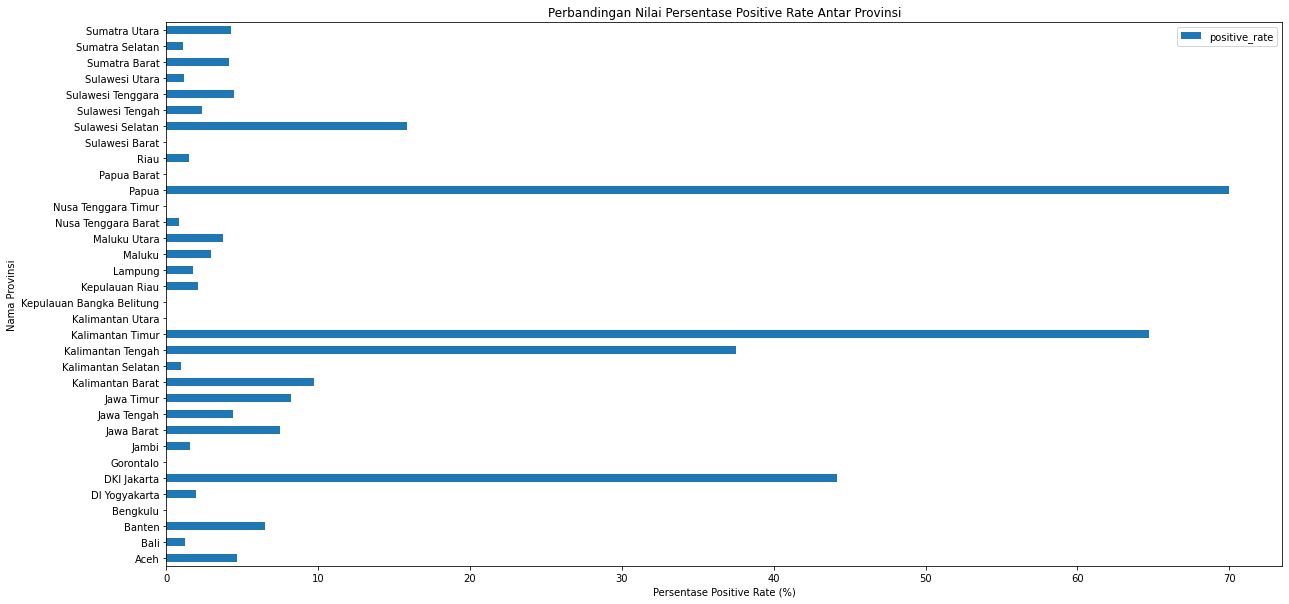

In [ ]:
# visualisasi bar plot
soal4.plot(kind = 'barh', figsize = (20,10))
plt.title('Perbandingan Nilai Persentase Positive Rate Antar Provinsi')
plt.ylabel('Nama Provinsi')
plt.xlabel('Persentase Positive Rate (%)')
plt.show()

Output di atas merupakan bar plot yang memvisualisasikan perbandingan nilai persentase positive rate antar provinsi.

Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.

In [ ]:
highest_rate = df2[['province_name', 'positive_rate']].sort_values(by = ['positive_rate'], ascending = False)
highest_rate.head(3)

,province_name,positive_rate
23,Papua,70.000000
14,Kalimantan Timur,64.705882
5,DKI Jakarta,44.198078


Berdasarkan output diatas, 3 provinsi yang memiliki positive rate tertinggi adalah : 
1.   Papua
2.   Kalimantan Timur
3.   DKI Jakarta



# **Soal 5 (20 poin)**
Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau.

In [ ]:
# groupby berdasarkan pulau
soal5 = df2.groupby('island', axis = 0).sum()

<function matplotlib.pyplot.show>

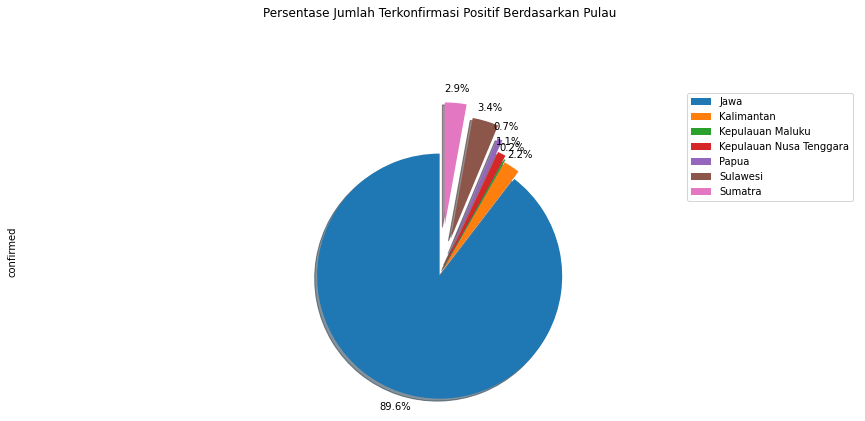

In [ ]:
# visualisasi pie chart
soal5['confirmed'].plot(kind = 'pie', figsize = (15, 6), autopct = '%1.1f%%', startangle = 90, shadow = True,
                        labels = None, pctdistance = 1.12, explode = [0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4])


plt.title('Persentase Jumlah Terkonfirmasi Positif Berdasarkan Pulau', y = 1.2)
plt.legend(labels = soal5.index, loc = 'upper right')
plt.axis('equal')
plt.show

Output di atas merupakan pie chart yang memvisualisasikan nilai persentase jumlah terkonfirmasi positif untuk masing-masing pulau.